In [1]:
import pandas as pd
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format
uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


In [2]:
colunas_de_notas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']
dados_notas_dropna = dados[colunas_de_notas].dropna()
dados_notas_dropna.columns = ['ciencias_naturais','ciencias_humanas','linguagem_codigo','matematica','redacao']
dados_notas_dropna.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


Explicação sobre uma das possibilidades do aprendizado de máquina:

11   2 ?? treino para IA

22   4 ?? treino para IA

34   7 ?? treino para IA

21   3 ?? treino para IA


54 = ?  9?? teste

In [3]:
colunas_falta1 = ['ciencias_naturais','ciencias_humanas','matematica','redacao']
tenho = dados_notas_dropna[colunas_falta1]
tenho.head(2)

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.10,671.30,738.00,680.00
2,409.20,531.70,438.10,600.00


In [0]:
coluna_falta = ['linguagem_codigo']

In [0]:
adivinhar = dados_notas_dropna[coluna_falta]

In [7]:
adivinhar

,linguagem_codigo
1,661.60
2,389.00
3,448.50
6,521.00
8,524.40
...,...
137835,504.80
137836,528.50
137838,538.30
137840,468.10


In [0]:
# Agora precisa de uma função que f(tenho) === (adivinha) ou [f(x) === y]
# Primeiro vai ser quebrado os dados em blocos de treino e teste com uso de biblioteca
# Para faciliar o entendimento entre a aula e os testes dos alunos está sendo fixado o random tanto de biblioteca
#  quanto do train_test_split

from sklearn.model_selection import train_test_split

import numpy as np
np.random.seed(43267)

x_treino, x_teste, y_treino, y_teste = train_test_split(tenho, adivinhar, random_state = 326784)

In [21]:
print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(72952, 4)
(24318, 4)
(72952, 1)
(24318, 1)


In [0]:
#Agora a hora de treinar o algoritimo e existe diversas formas
from sklearn.svm import LinearSVR

Desafio 1 - Explore os parâmetros C e o max_iter. Não há garantias que o resultado será melhor.

In [10]:
modelo = LinearSVR()
modelo.fit(x_treino, y_treino['linguagem_codigo'])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [11]:
y_treino

,linguagem_codigo
25012,608.10
52044,622.00
86543,476.40
36362,531.60
96734,725.90
...,...
136051,402.90
15740,618.40
70141,524.60
132741,608.70


In [0]:
predicoes_notas_linguagem_codigo = modelo.predict(x_teste)

In [13]:
predicoes_notas_linguagem_codigo[:5]

array([591.30581763, 606.46025242, 639.89298788, 555.97651583,
       472.52000416])

In [14]:
y_teste[:5]

,linguagem_codigo
67300,577.20
113766,624.40
48328,703.00
9454,598.60
9515,458.60


In [0]:
import seaborn as sns

In [18]:
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem_codigo)

Exception: ignored

In [19]:
predicoes_notas_linguagem_codigo


array([591.30581763, 606.46025242, 639.89298788, ..., 418.26406796,
       445.17689891, 578.94210246])

In [20]:
len(predicoes_notas_linguagem_codigo)

24318

In [21]:
y_teste.values


array([[577.2],
       [624.4],
       [703. ],
       ...,
       [397.4],
       [521.6],
       [619.9]])

In [22]:
len(y_teste)

24318

In [23]:
y_teste.shape

(24318, 1)

In [24]:
predicoes_notas_linguagem_codigo.shape

(24318,)

In [25]:
y_teste.columns

Index(['linguagem_codigo'], dtype='object')

In [26]:
y_teste['linguagem_codigo'].values

array([577.2, 624.4, 703. , ..., 397.4, 521.6, 619.9])

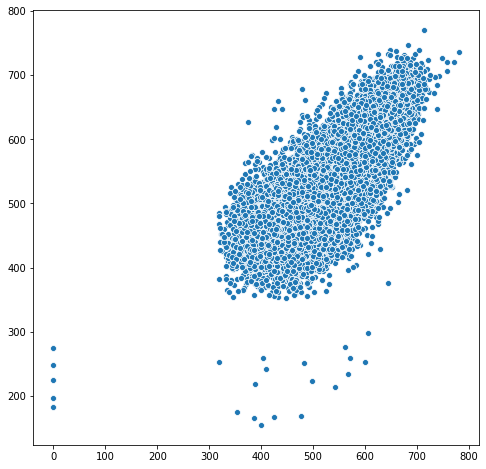

In [28]:
#Veja que um dos itens é um DataFrame e outro um Series isso deve ter ocorrido pela forma de seleção no ínicio, 
# para solucionar nesse ponto estou selecionando apenas a coluna do DataFrame que vai retornar um series.
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

sns.scatterplot(x=y_teste['linguagem_codigo'].values, y=predicoes_notas_linguagem_codigo)

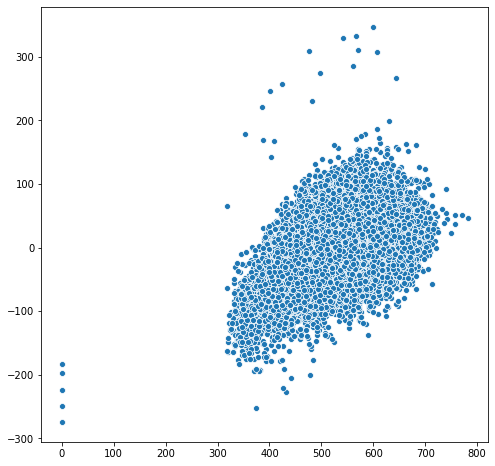

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

sns.scatterplot(x=y_teste['linguagem_codigo'].values, y=y_teste['linguagem_codigo'].values - predicoes_notas_linguagem_codigo)

In [38]:
x_treino.mean(axis=1)

25012    665.88
52044    632.60
86543    454.25
36362    470.17
96734    891.25
          ...  
136051   499.25
15740    624.62
70141    460.35
132741   601.30
76871    755.85
Length: 72952, dtype: float64

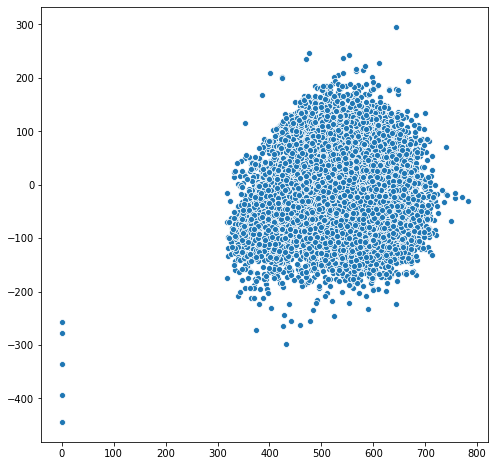

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize= (8,8))
sns.scatterplot(x=y_teste['linguagem_codigo'].values, y=y_teste['linguagem_codigo'] - x_teste.mean(axis=1))

In [48]:
y_teste['linguagem_codigo'].values

array([577.2, 624.4, 703. , ..., 397.4, 521.6, 619.9])

In [51]:
from sklearn.svm import SVR
modelo = SVR()
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
predicoes_notas_linguagem_codigo_SVR = modelo.predict(x_teste)

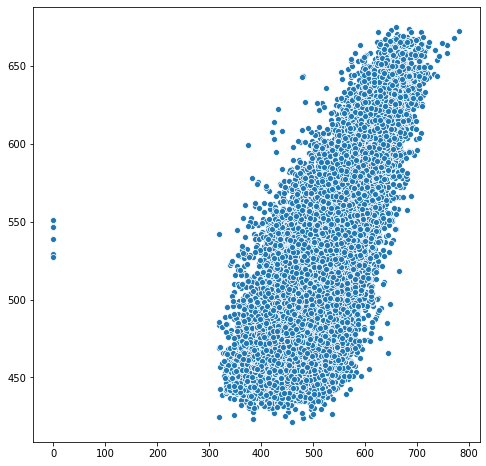

In [53]:
# Continua falho próximo de ZERO no entanto a distribuição é bem mais coerente utilizando SVR.
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

sns.scatterplot(x=y_teste['linguagem_codigo'].values, y=predicoes_notas_linguagem_codigo_SVR)

In [54]:
# Outro algoritimo Tree
from sklearn.tree import DecisionTreeRegressor
modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino['linguagem_codigo'].values)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

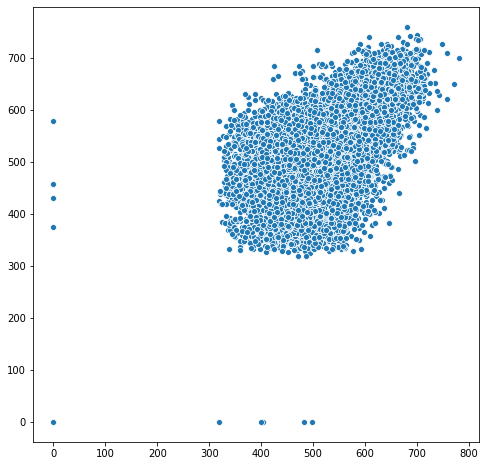

In [55]:
predicoes_notas_linguagem_codigo_tree = modelo.predict(x_teste)
plt.figure(figsize=(8,8))
sns.scatterplot(x=y_teste['linguagem_codigo'].values, y=predicoes_notas_linguagem_codigo_tree)

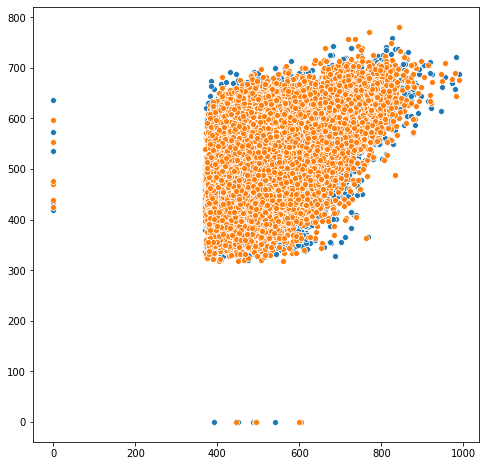

In [59]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=x_teste['matematica'].values, y=predicoes_notas_linguagem_codigo_tree)
sns.scatterplot(x=x_teste['matematica'].values, y=y_teste['linguagem_codigo'].values)


In [58]:
x_teste.columns

Index(['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao'], dtype='object')

In [60]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_teste, predicoes_notas_linguagem_codigo_tree)

4186.22

In [68]:

mean_squared_error(y_teste, predicoes_notas_linguagem_codigo)

2324.42

In [67]:
mean_squared_error(y_teste, y_teste)

0.00

In [69]:
#Menor diferença, melhor taxa de acerto
mean_squared_error(y_teste, predicoes_notas_linguagem_codigo_SVR)

2050.19

In [72]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste, dummy_predicoes)

5137.48

Desafio 3 - Plotar no eixo X a média das 4 notas ao invés de uma só

In [63]:
x_teste.mean().mean()

529.64

In [65]:
x_teste.mean(axis=1).mean()

529.64

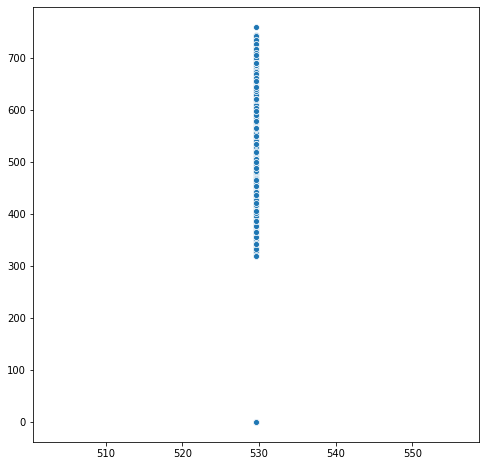

In [66]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=x_teste.mean().mean(), y=predicoes_notas_linguagem_codigo_tree)


Questionamentos Paulo
- A mediana como dummy vai ser melhor (os zeros puxam a média para baixo)?

- E se tiramos os zeros?

- Temos mil algoritmos, inúmeros parâmetros. Por melhor que seja, o que fazer? Da para rodar todos e ter uma resposta de qual o melhor?


In [73]:
#Mediana como Dummy
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor('median')
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste, dummy_predicoes)

5160.29

In [0]:
#Desafio 4 - E aí, como ficou o desafio de ontem sem os ZEROS?

Desafio 5 - Interprete tudo que você fez e a sua conclusão.

Desafio 6 - Calcule as métricas de erro que utilizamos (mean suqare root error) também no conjunto de treino, e veja o que acontece comparando com o conjunto de teste.

Menor diferença

In [0]:
#Eliminar conjunto de ZEROS em qualquer nota
dados_notas_dropna = dados[colunas_de_notas].dropna()
dados_notas_dropna_limpo = dados_notas_dropna.query("NU_NOTA_CN > 0 and NU_NOTA_CH > 0 and NU_NOTA_LC > 0 and NU_NOTA_MT > 0 and NU_NOTA_REDACAO > 0")




In [0]:
from sklearn.svm import SVR
modelo = SVR()
modelo.fit(x_treino, y_treino)

predicoes_notas_linguagem_codigo_SVR = modelo.predict(x_teste)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

sns.scatterplot(x=y_teste['linguagem_codigo'].values, y=predicoes_notas_linguagem_codigo_SVR)


In [0]:
#Menor diferença, melhor taxa de acerto
mean_squared_error(y_teste, predicoes_notas_linguagem_codigo_SVR)